# ML Project - Bank Marketing Prediction

By - A.Yash Kumar Rao

In [111]:
# First, we'll import pandas,numpy , a data processing and CSV file I/O library
import pandas as pd
import numpy as np

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [112]:
# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
df = pd.read_csv(r"D:\BoardInfinity\project\ML\ML Project1_BMP\bank-marketing.csv") # the dataset is now a Pandas DataFrame

# Let's see what's in the data - Jupyter notebooks print the result of the last thing you do
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [113]:
df.shape

(45211, 19)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 4.7+ MB


In [115]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [116]:
categorical_columns = [column for column in df.columns[:-1] if df[column].dtype == "O"]
print(categorical_columns)

['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [117]:
for column in categorical_columns:
    print("Unique values in",column,"are", df[column].unique() )

Unique values in job are ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in marital are ['married' 'single' 'divorced']
Unique values in education are ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in targeted are ['yes' 'no']
Unique values in default are ['no' 'yes']
Unique values in housing are ['yes' 'no']
Unique values in loan are ['no' 'yes']
Unique values in contact are ['unknown' 'cellular' 'telephone']
Unique values in month are ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in poutcome are ['unknown' 'failure' 'other' 'success']


In [118]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [119]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [120]:
print("Mean of the pdays column is", df['pdays'].mean())
print("Median of the pdays column is", df['pdays'].median())
print("Min of the pdays column is", df['pdays'].min())

Mean of the pdays column is 40.19782796222158
Median of the pdays column is -1.0
Min of the pdays column is -1


__"pdays" column signifies No. of days passed after the client was contacted from previous campaign.
If value is -1 i.e. It is an outlier because no. of days passed can't be negative.__

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [121]:
print("Mean of pdays column after eliminating -1 values is", df[df['pdays'] != -1]['pdays'].mean() )
print("Median of pdays column after eliminating -1 values is", df[df['pdays'] != -1]['pdays'].median() )

Mean of pdays column after eliminating -1 values is 224.57769165556496
Median of pdays column after eliminating -1 values is 194.0


__After skipping the outlier -1 mean and median values are changed to a much extent.__

### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

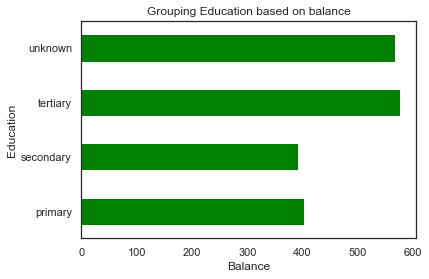

In [122]:
from matplotlib import *
df.groupby('education')['balance'].median().plot.barh(color='green')
plt.ylabel('Balance')
plt.title('Education wise Median of Balance');
plt.ylabel('Education')
plt.xlabel('Balance')
plt.title('Grouping Education based on balance');

__Tertiary education level has the highest median.__

### Make a box plot for pdays. Do you see any outliers?

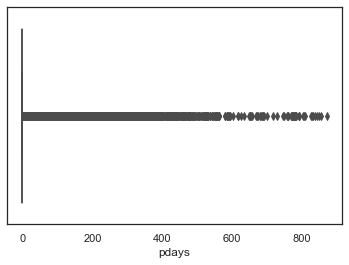

In [123]:
sns.boxplot(df.pdays, orient='v');

__Yes, there are lot of outliers in pdays column.__

In [124]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [125]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

__There are no null values.__

In [126]:
df.response.replace({'no':0,'yes':1} ,inplace = True)

In [127]:
df.response.sample(10)

23577    0
37696    0
42688    1
44395    1
29304    0
5595     0
40292    0
7686     0
43040    1
37664    0
Name: response, dtype: int64

__We have successfully handled the Target variable i.e Response columns.__

In [128]:
df.corr()

,age,salary,balance,day,duration,campaign,pdays,previous,response
age,1.000000,0.024357,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
salary,0.024357,1.000000,0.055469,0.027864,-0.009937,0.015005,-0.014968,0.014564,0.020012
balance,0.097783,0.055469,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.027864,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,-0.009937,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,0.015005,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,-0.014968,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.014564,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
response,0.025155,0.020012,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


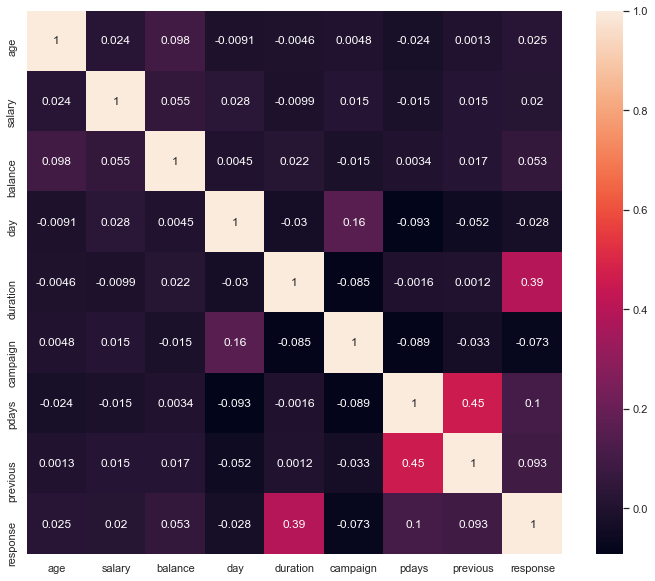

In [129]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True);

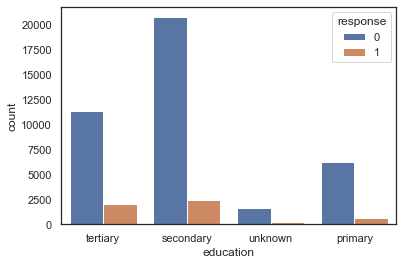

In [130]:
sns.countplot(df['education'],hue=df['response']);

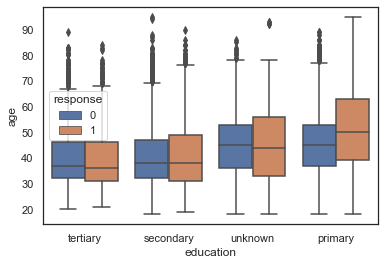

In [131]:
sns.boxplot(df['education'],df['age'],hue=df['response']);

### Are pdays and poutcome associated with the target?

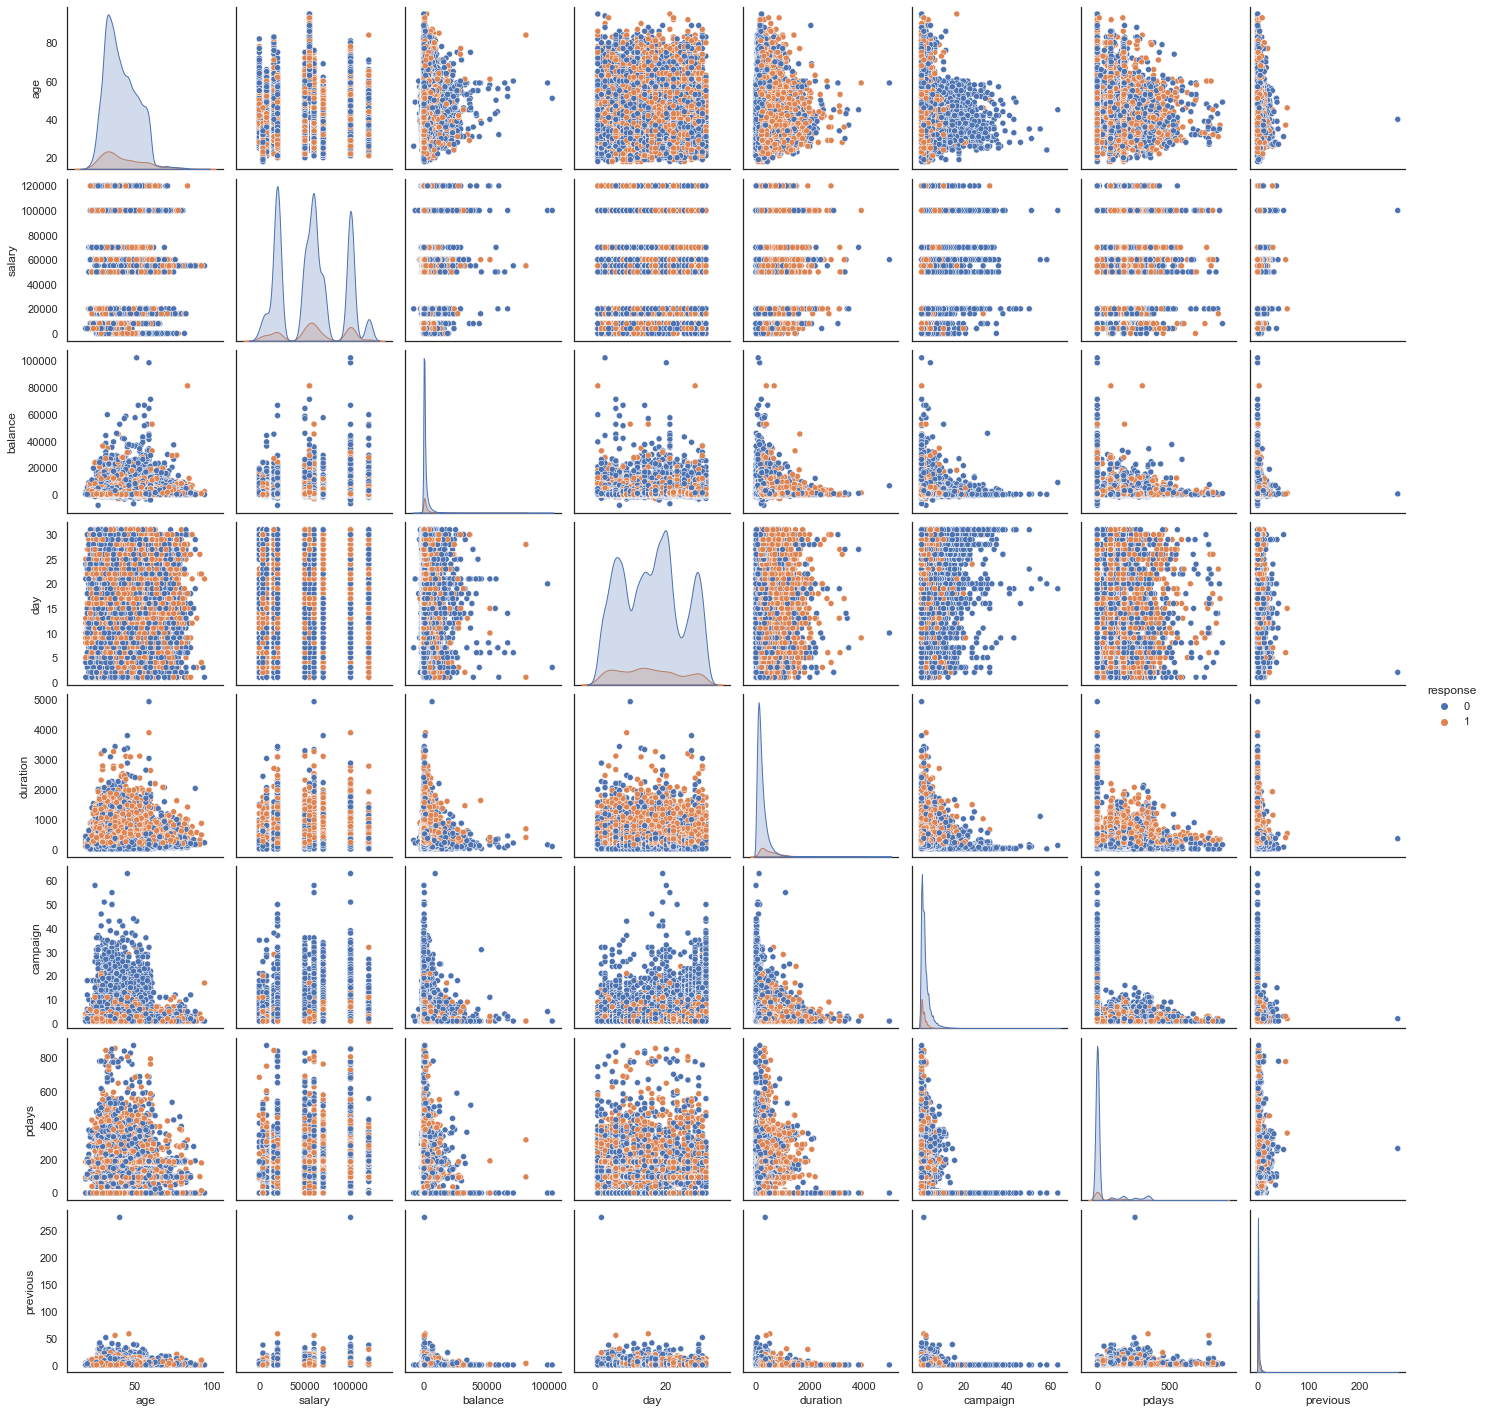

In [132]:
sns.pairplot(df,hue='response');

### Associations of categorical variables

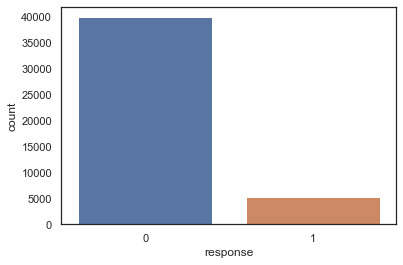

In [133]:
sns.countplot(x='response', data=df);

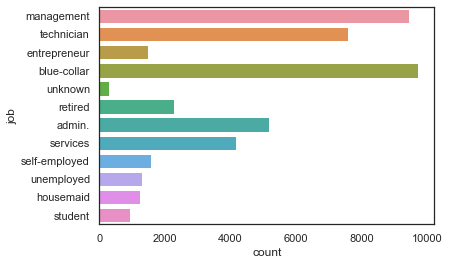

In [134]:
sns.countplot(y='job', data=df);

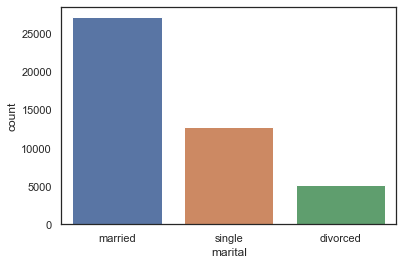

In [135]:
sns.countplot(x='marital', data=df);

<AxesSubplot:xlabel='count', ylabel='education'>

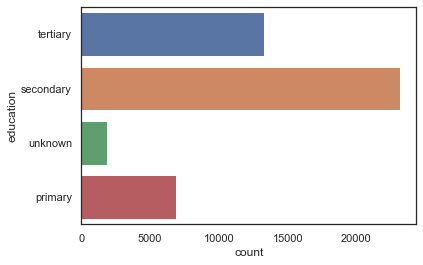

In [136]:
sns.countplot(y='education', data=df)

### Are the features about the previous campaign data useful?

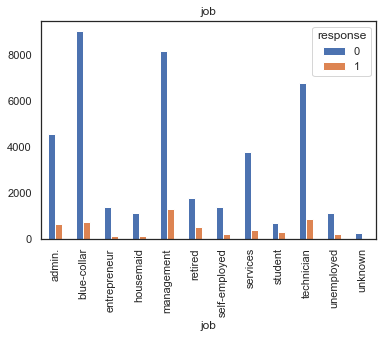

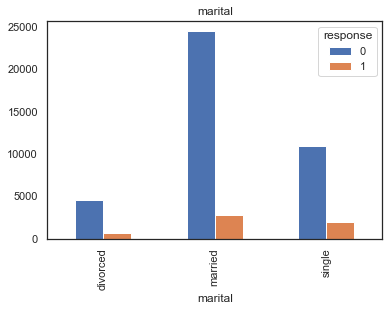

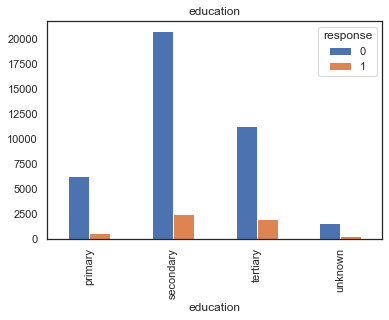

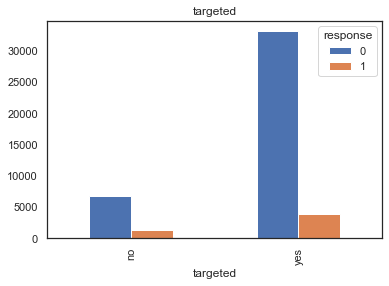

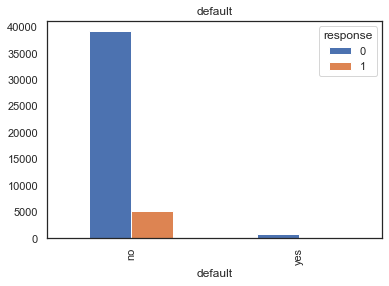

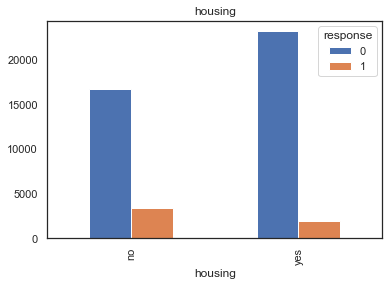

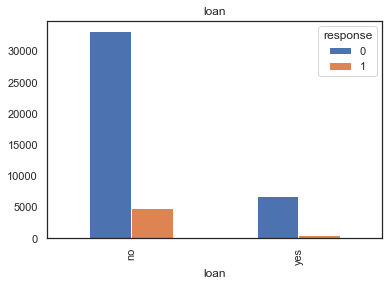

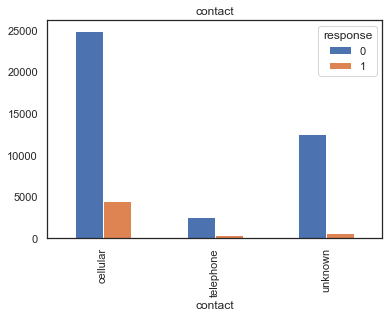

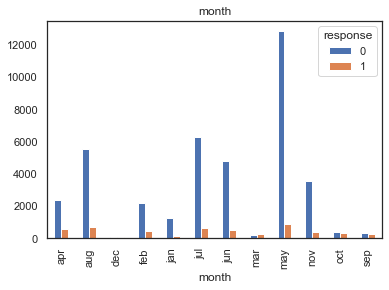

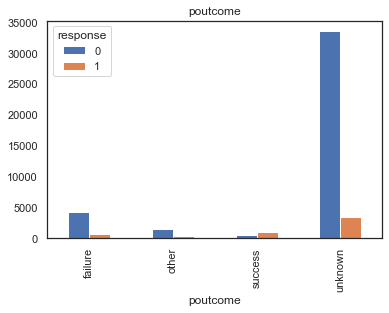

In [137]:
for column in categorical_columns:
    pd.crosstab(df[column],df['response']).plot.bar()
    plt.title(column)

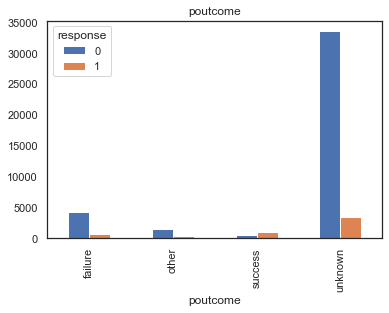

In [138]:
pd.crosstab(df['poutcome'],df['response']).plot.bar()
plt.title('poutcome');

__'poutcome' column is not assosciated with target column because it has more than 80% missing values.__

In [139]:
df.drop('poutcome',axis=1,inplace=True)

In [140]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [141]:
df['previous'].value_counts().head()

0    36954
1     2772
2     2106
3     1142
4      714
Name: previous, dtype: int64

### how do you handle the pdays column with a value of -1 where the previous campaign data is missing?

In [142]:
df['pdays_no_contact'] = np.where(df['pdays']==-1,1,0)
df['pdays_no_contact'].value_counts()

1    36954
0     8257
Name: pdays_no_contact, dtype: int64

__We created a new column since majority of users were not previously contacted. We are capturing importance of missing values.__ 

### Handling Missing Values in Categorical columns

In [143]:
categorical_columns

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [144]:
for column in categorical_columns[:-1]:
    print(df[column].value_counts(),"\n")

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

yes    37091
no      8120
Name: targeted, dtype: int64 

no     44396
yes      815
Name: default, dtype: int64 

yes    25130
no     20081
Name: housing, dtype: int64 

no     37967
yes     7244
Name: loan, dtype: int64 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 



__Missing Values are represented as Unknown which is better way to handle missing data by becoming a new category itself rather than imputing it with the mode of the particular column.__

### Handling Outliers in the Data.

In [145]:
num_columns = [col for col in df.columns if col not in categorical_columns]
print(num_columns)

['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response', 'pdays_no_contact']


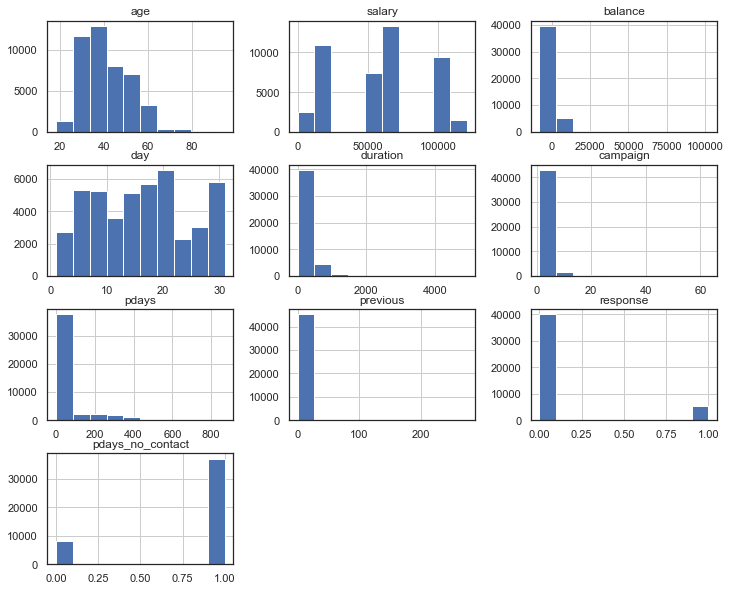

In [146]:
dist=df.hist(figsize=(12,10)) # display numerical feature distribution

In [147]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

upper_boundary = df['age'].mean() + 3* df['age'].std()
lower_boundary = df['age'].mean() - 3* df['age'].std()
print(lower_boundary), print(upper_boundary),print(df['age'].mean())

9.079924091402106
72.79249633725463
40.93621021432837


(None, None, None)

In [148]:
index = df[(df['age']>upper_boundary) | (df['age']<lower_boundary)].index
df.drop(index=index,axis=0,inplace=True)

In [149]:
df[(df['age']>upper_boundary) | (df['age']<lower_boundary)]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact


In [150]:
##### Assuming Balance follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.balance.quantile(0.75)-df.balance.quantile(0.25)

lower_bridge = df['balance'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['balance'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-1940.5
3423.5


In [151]:
df[(df['balance']>upper_bridge) | (df['balance']<lower_bridge)]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
34,51,management,100000,married,tertiary,yes,no,10635,yes,no,unknown,5,may,336,1,-1,0,0,1
65,51,management,100000,married,tertiary,yes,no,6530,yes,no,unknown,5,may,91,1,-1,0,0,1
69,35,blue-collar,20000,single,secondary,yes,no,12223,yes,yes,unknown,5,may,177,1,-1,0,0,1
70,57,blue-collar,20000,married,secondary,yes,no,5935,yes,yes,unknown,5,may,258,1,-1,0,0,1
186,40,services,70000,divorced,unknown,no,no,4384,yes,no,unknown,5,may,315,1,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45159,60,services,70000,married,secondary,yes,no,4428,no,no,cellular,9,nov,125,1,96,6,0,0
45164,35,services,70000,married,tertiary,yes,no,4655,no,no,cellular,9,nov,111,2,-1,0,0,1
45181,46,blue-collar,20000,married,secondary,yes,no,6879,no,no,cellular,15,nov,74,2,118,3,0,0
45185,60,services,70000,married,tertiary,yes,no,4256,yes,no,cellular,16,nov,200,1,92,4,1,0


In [152]:
index = df[(df['balance']>upper_bridge) | (df['balance']<lower_bridge)].index
df.drop(index=index,axis=0,inplace=True)

In [153]:
df[(df['balance']>upper_bridge) | (df['balance']<lower_bridge)]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact


In [154]:
df.reset_index(inplace=True)

<AxesSubplot:>

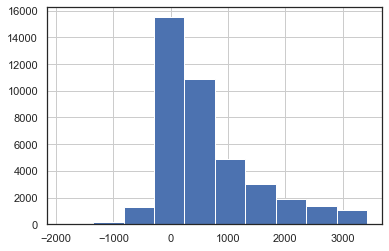

In [155]:
df['balance'].hist()

<AxesSubplot:>

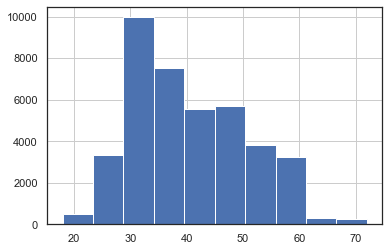

In [156]:
df['age'].hist()

__Outliers are handled now.__

## Handling Categorical columns.

In [157]:
df.head()

,index,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,0,1
1,1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,0,1
2,2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,0,1
3,3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,0,1
4,4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,0,1


In [158]:
df.drop('index',axis=1,inplace=True)
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,0,1
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,0,1
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,0,1
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,0,1
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,0,1


In [159]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [160]:
dictionary={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12
}

df['month']=df['month'].map(dictionary)

In [161]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [162]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,5,261,1,-1,0,0,1
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,5,151,1,-1,0,0,1
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,5,76,1,-1,0,0,1
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,5,92,1,-1,0,0,1
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,5,198,1,-1,0,0,1


In [163]:
df1 = df.copy()
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,5,261,1,-1,0,0,1
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,5,151,1,-1,0,0,1
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,5,76,1,-1,0,0,1
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,5,92,1,-1,0,0,1
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,5,198,1,-1,0,0,1


In [164]:
df1 = pd.get_dummies(df1,drop_first=True)
df1.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,response,...,marital_single,education_secondary,education_tertiary,education_unknown,targeted_yes,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,100000,2143,5,5,261,1,-1,0,0,...,0,0,1,0,1,0,1,0,0,1
1,44,60000,29,5,5,151,1,-1,0,0,...,1,1,0,0,1,0,1,0,0,1
2,33,120000,2,5,5,76,1,-1,0,0,...,0,1,0,0,1,0,1,1,0,1
3,47,20000,1506,5,5,92,1,-1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,33,0,1,5,5,198,1,-1,0,0,...,1,0,0,1,0,0,0,0,0,1


In [165]:
df1.shape

(40121, 33)

In [166]:
df1.loc[df1['pdays']==-1,'pdays']=0
df1['pdays'].head()

0    0
1    0
2    0
3    0
4    0
Name: pdays, dtype: int64

## Feature Selection

In [167]:
# from sklearn.ensemble import ExtraTreesClassifier
# import matplotlib.pyplot as plt
# model=ExtraTreesClassifier()
# model.fit(X,y)

In [168]:
# print(model.feature_importances_)

In [169]:
# plt.figure(figsize=(10,10))
# ranked_features=pd.Series(model.feature_importances_,index=X.columns)
# ranked_features.nlargest(32).plot(kind='barh');

### Handling Imbalanced Dataset

Percentage of subsription :  10.926945988385135
Percentage of no subscription :  89.07305401161486


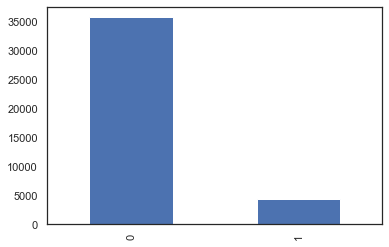

In [170]:
#Check the percentage of 0 to 1
No_sub = len(df[df['response'] == 0])
Sub = len(df[df['response'] == 1])
percent_No_sub = (No_sub/len(df['response'])) * 100
percent_sub = (Sub/len(df['response'])) * 100

print('Percentage of subsription : ',percent_sub)
print('Percentage of no subscription : ', percent_No_sub)


df['response'].value_counts().plot.bar();

In [171]:
from imblearn.combine import SMOTETomek

In [172]:
X = df1.drop('response',axis=1)
y = df1['response']

In [173]:
from collections import Counter

os=SMOTETomek(1)
X_ns,y_ns = os.fit_sample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_ns)))

The number of classes before fit Counter({0: 35737, 1: 4384})
The number of classes after fit Counter({0: 34643, 1: 34643})


In [174]:
y_ns.value_counts()

1    34643
0    34643
Name: response, dtype: int64

In [175]:
y_ns.head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [176]:
X_ns.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,...,marital_single,education_secondary,education_tertiary,education_unknown,targeted_yes,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,100000,2143,5,5,261,1,0,0,1,...,0,0,1,0,1,0,1,0,0,1
1,44,60000,29,5,5,151,1,0,0,1,...,1,1,0,0,1,0,1,0,0,1
2,33,120000,2,5,5,76,1,0,0,1,...,0,1,0,0,1,0,1,1,0,1
3,47,20000,1506,5,5,92,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
4,33,0,1,5,5,198,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1


## Feature Selection for model development

In [177]:
# X_ns.drop(['job_management', 'job_technician', 'job_entrepreneur',
#        'job_blue-collar', 'job_unknown', 'job_retired', 'job_admin.',
#        'job_services', 'job_self-employed', 'job_unemployed',
#        'job_housemaid', 'job_student'],axis=1)

In [178]:
job = 'job_'+df['job'].unique()

In [179]:
job

array(['job_management', 'job_technician', 'job_entrepreneur',
       'job_blue-collar', 'job_unknown', 'job_retired', 'job_admin.',
       'job_services', 'job_self-employed', 'job_unemployed',
       'job_housemaid', 'job_student'], dtype=object)

In [180]:
X_ns.drop(['job_management', 'job_technician', 'job_entrepreneur',
       'job_blue-collar', 'job_unknown', 'job_retired',
       'job_services', 'job_self-employed', 'job_unemployed',
       'job_housemaid', 'job_student'],axis=1,inplace=True)

In [181]:
'marital_'+df['marital'].unique()

array(['marital_married', 'marital_single', 'marital_divorced'],
      dtype=object)

In [182]:
X_ns.drop(['marital_married', 'marital_single'],axis=1,inplace=True)

In [183]:
X_ns.drop(['targeted_yes', 'default_yes'],axis=1,inplace=True)

In [184]:
X_ns.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,100000,2143,5,5,261,1,0,0,1,0,1,0,1,0,0,1
1,44,60000,29,5,5,151,1,0,0,1,1,0,0,1,0,0,1
2,33,120000,2,5,5,76,1,0,0,1,1,0,0,1,1,0,1
3,47,20000,1506,5,5,92,1,0,0,1,0,0,1,1,0,0,1
4,33,0,1,5,5,198,1,0,0,1,0,0,1,0,0,0,1


In [185]:
X_ns.shape

(69286, 17)

In [186]:
y_ns.shape

(69286,)

## Feature Scaling

In [187]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [188]:
scaler=StandardScaler()
### fit vs fit_transform
scaler.fit_transform(X_ns)

array([[ 1.74738921,  1.3313921 ,  1.6443482 , ..., -0.33961658,
        -0.19154089,  2.15595959],
       [ 0.38738943,  0.09198967, -0.79482371, ..., -0.33961658,
        -0.19154089,  2.15595959],
       [-0.68118182,  1.95109332, -0.82597681, ...,  2.94449704,
        -0.19154089,  2.15595959],
       ...,
       [ 0.67881795, -0.21786094, -1.2978885 , ..., -0.33961658,
        -0.19154089, -0.46383059],
       [ 1.94167489, -0.06293564, -0.06561054, ..., -0.33961658,
        -0.19154089, -0.46383059],
       [-1.06975318, -0.21786094, -0.46944695, ..., -0.33961658,
        -0.19154089, -0.46383059]])

In [189]:
X_scaled = pd.DataFrame(scaler.fit_transform(X_ns),columns=X_ns.columns)
X_scaled.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown
0,1.747389,1.331392,1.644348,-1.301687,-0.412294,-0.341206,-0.525066,-0.485216,-0.330518,0.62756,-0.865031,1.679267,-0.158262,1.214035,-0.339617,-0.191541,2.15596
1,0.387389,0.091990,-0.794824,-1.301687,-0.412294,-0.657972,-0.525066,-0.485216,-0.330518,0.62756,1.156029,-0.595498,-0.158262,1.214035,-0.339617,-0.191541,2.15596
2,-0.681182,1.951093,-0.825977,-1.301687,-0.412294,-0.873948,-0.525066,-0.485216,-0.330518,0.62756,1.156029,-0.595498,-0.158262,1.214035,2.944497,-0.191541,2.15596
3,0.678818,-1.147413,0.909366,-1.301687,-0.412294,-0.827873,-0.525066,-0.485216,-0.330518,0.62756,-0.865031,-0.595498,6.318622,1.214035,-0.339617,-0.191541,2.15596
4,-0.681182,-1.767114,-0.827131,-1.301687,-0.412294,-0.522626,-0.525066,-0.485216,-0.330518,0.62756,-0.865031,-0.595498,6.318622,-0.823699,-0.339617,-0.191541,2.15596


## Model Development

In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X_scaled, y_ns, test_size=0.3, random_state=0)

In [191]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [192]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [193]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8936 1286]
 [1309 9255]]
0.8751563552391033
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     10222
           1       0.88      0.88      0.88     10564

    accuracy                           0.88     20786
   macro avg       0.88      0.88      0.88     20786
weighted avg       0.88      0.88      0.88     20786



## Cross Validation

In [194]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X_scaled,y_ns,cv=15)

score

array([0.79675325, 0.82377138, 0.94436025, 0.92963845, 0.91513315,
       0.89499892, 0.90019485, 0.84736956, 0.89867937, 0.85343148,
       0.70080104, 0.83806019, 0.86295735, 0.88677203, 0.740853  ])

In [195]:
score.mean()

0.8555849497979829

## Random Forest Classifier

In [196]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[9453  769]
 [ 573 9991]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10222
           1       0.93      0.95      0.94     10564

    accuracy                           0.94     20786
   macro avg       0.94      0.94      0.94     20786
weighted avg       0.94      0.94      0.94     20786

0.9354373135764457


## Hyperparameter Optimization

In [197]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,15)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 80, 151, 222, 292, 363, 434, 504, 575, 646, 717, 787, 858, 929, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [198]:
clf_randomcv = RandomizedSearchCV(estimator=clf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
clf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=20,
                                                    random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 80, 151, 222, 292,
                                                      363, 434, 504, 575, 646,
                                                      717, 787, 858, 929,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   random_state=100, verbose=2)

In [199]:
clf_randomcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=858, max_features='log2',
                       n_estimators=30, random_state=0)

In [200]:
clf_randomcv.best_score_

0.9288041172738

In [201]:
clf_randomcv.best_params_

{'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 858,
 'criterion': 'entropy'}

In [202]:
clf_best_random = clf_randomcv.best_estimator_

In [203]:
y_pred = clf_best_random.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[ 9441   781]
 [  515 10049]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     10222
           1       0.93      0.95      0.94     10564

    accuracy                           0.94     20786
   macro avg       0.94      0.94      0.94     20786
weighted avg       0.94      0.94      0.94     20786

0.9376503415760609


## K-Fold cross validation

In [204]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf_best_random,X_scaled,y_ns,cv=15)

score

array([0.76688312, 0.85689543, 0.94998918, 0.94977268, 0.95496861,
       0.91578264, 0.93418489, 0.89499892, 0.95843256, 0.88763802,
       0.83481273, 0.69105867, 0.88287508, 0.90668976, 0.68196579])

In [205]:
score.mean()

0.871129871067087

__Random Forest Performs much better as its average accuracy score is 87.3% to that of Logistic regression which has an accuracy of 85.8%.__

__I have used Accuracy as a metric to compare because I have handled the imbalanced data, would it be imbalanced I should have used F1-score.__